(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5001 - accuracy: 0.8242
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3764 - accuracy: 0.8641
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3405 - accuracy: 0.8767
Epoch 4/20
1875/1875 [==

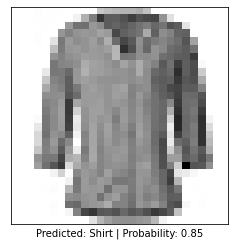

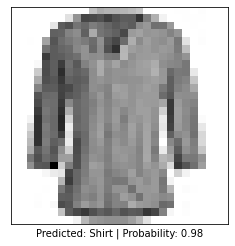

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

def show_image_grids(train_images, train_labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[train_labels[i]])
  plt.show()

if __name__ == '__main__':
  fashion_mnist = keras.datasets.fashion_mnist
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
  print(train_images.shape)
  print(train_labels.shape)
  print(test_images.shape)
  print(test_labels.shape)
    
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  #show_image_grids(train_images, train_labels) 
    
  # Steps 3~8 (10 points)

  train_images = train_images / 255.0
  test_images = test_images / 255.0


  input_shape = (28, 28)
  output_shape = 10
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(output_shape, activation=tf.nn.softmax)
])


model.summary()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


tb_callback = TensorBoard(log_dir='log_fashion')


checkpoint_path = "ckpt_fashion/cp-{epoch:04d}.ckpt"
cp_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True,
                              verbose=1, period=5)
  
  # Steps 9, 10 (5 points)

model.fit(train_images, train_labels, epochs=20, callbacks=[cp_callback, tb_callback])


test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

  # Step 12 (5 points)


for epoch in [5, 10, 15, 20]:
    weight_path = f"ckpt_fashion/cp-{epoch:04d}.ckpt"
    model.load_weights(weight_path)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f'Epoch {epoch} - Test accuracy: {acc}')
    
  # Step 13 (10 points)
#Load the ckpt saved at epoch = 20.
model.load_weights("ckpt_fashion/cp-0020.ckpt")

prob = model.predict(test_images)
# print(prob)
predictions = np.argmax(prob, axis=1)
test_acc = np.mean(predictions == test_labels)
print('Test accuracy (using argmax):', test_acc)

  # Step 14 (10 points)


img = test_images[4]
flipped = np.fliplr(img)

prob = model.predict(img.reshape(1, 28, 28))
predicted_class = np.argmax(prob)
description = f'Predicted: {class_names[predicted_class]} | Probability: {prob[0][predicted_class]:.2f}'

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap=plt.cm.binary)
plt.xlabel(description)
plt.show()

prob_f = model.predict(flipped.reshape(1, 28, 28))
predicted_class_flipped = np.argmax(prob_f)
description_f = f'Predicted: {class_names[predicted_class_flipped]} | Probability: {prob_f[0][predicted_class_flipped]:.2f}'

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(flipped, cmap=plt.cm.binary)  
plt.xlabel(description_f)


plt.show()



In [3]:
# Question 1. What is the difference between the following two options in model.compile()? (5 points)
#	loss='categorical_crossentropy'
#	loss='sparse_categorical_crossentropy'
# Use an example to illustrate the difference.
# Write down your answer here.

# 假設有4個類別[[0,0][0,1][1,0][1,1]]
# 標籤分別是      0    1    2    3
#
# 假設我有5筆樣本
# 分別是[0,0][0,1][1,0][1,1][1,0]
# categorical_crossentropy的LABEL會是
# label = [
#           [0,0]
#           [0,1]
#           [1,0]
#           [1,1]
#           [1,0]
#]
# 但是使用sparse_categorical_crossentropy的話 
# label = [0, 1, 2, 3, 2]
